In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors
tfpl = tfp.layers

In [ ]:
tfp.__version__

'0.12.1'

# Bijectors and normalising flows

 ## Coding tutorials
 #### [1. Bijectors](#coding_tutorial_1)
 #### [2. The TransformedDistribution class](#coding_tutorial_2)
 #### [3. Subclassing bijectors](#coding_tutorial_3)
 #### [4. Normalising flows](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Bijectors

In [ ]:
# Define base distribution

normal = tfd.Normal(loc=0., scale=1.)

In [ ]:
# Sample from base distribution

n = 1000
z = normal.sample(n)

### Scale and shift bijector

In [ ]:
# Define scale and shift
scale = 4.5
shift = 7


In [ ]:
# Define chain bijector

scale_and_shift = tfb.Chain([tfb.Shift(shift), tfb.Scale(scale)])

In [ ]:
# We can also use call methods

scale_transf = tfb.Scale(scale)
shift_transf = tfb.Shift(shift)
scale_and_shift = shift_transf(scale_transf)

In [ ]:
# Apply the forward transformation

x = scale_and_shift(z)
x.shape

TensorShape([1000])

In [ ]:
# Check the forward transformation

tf.norm(x - (scale*z + shift))

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

#### Plots

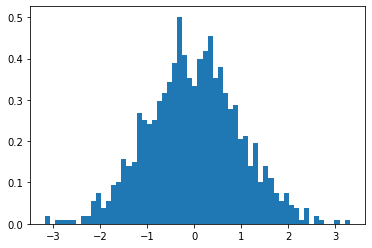

In [ ]:
# Plot z density

plt.hist(z, bins=60, density=True)
plt.show()

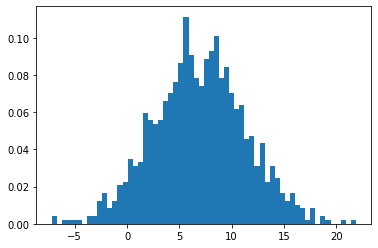

In [ ]:
# Plot x density

plt.hist(x, bins=60, density=True)
plt.show()

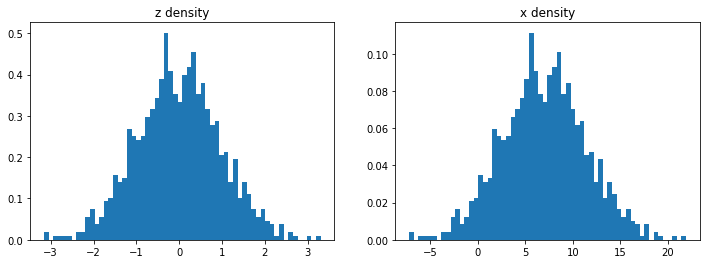

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(z, bins=60, density=True )
plt.gca().set_title('z density')
plt.subplot(1, 2, 2)
plt.hist(x, bins=60, density=True)
plt.gca().set_title('x density')
plt.show()

#### Inverse transformation

In [ ]:
# Apply inverse transformation

inv_x = scale_and_shift.inverse(x)

In [ ]:
# Check inverse transformation

tf.norm(inv_x -z)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

#### Log probability

In [ ]:
# Compute log prob for x

log_prob_x = normal.log_prob(z) - scale_and_shift.forward_log_det_jacobian(z, event_ndims=0)
print(log_prob_x)

tf.Tensor(
[-3.7114964 -2.469112  -2.488827  -2.448228  -2.4232745 -2.7324762
 -3.6740184 -2.5387678 -2.4304523 -3.6659117 -2.4923131 -2.6132069
 -3.002346  -3.5737069 -3.0697603 -2.493516  -2.46348   -2.4622796
 -2.7105079 -2.4401035 -3.5210743 -3.183703  -2.8056657 -2.9647956
 -3.3859224 -2.5105362 -2.4232821 -2.424161  -3.0283875 -3.1289363
 -2.795566  -2.5876698 -3.7498202 -3.0129178 -2.5298076 -2.474724
 -2.4758356 -3.676021  -2.4419723 -2.4463754 -2.6272335 -2.9327226
 -4.8492494 -3.849702  -4.4802904 -2.4350164 -2.8452182 -2.4800792
 -3.8265603 -2.5002828 -2.9559946 -4.310647  -2.430125  -2.6022384
 -2.879518  -2.5202749 -2.4237692 -2.7788348 -3.3933666 -2.8418028
 -2.4343085 -3.1719518 -3.0479164 -3.3809502 -2.6286693 -2.4300065
 -2.5959342 -2.5836704 -2.429865  -2.5427055 -3.0129528 -3.5267863
 -3.4679627 -2.601566  -2.6895075 -2.5427365 -3.4070456 -2.5881844
 -2.504665  -2.4720392 -2.4874978 -2.5298958 -2.7112756 -2.5072045
 -2.5126774 -2.9428284 -2.468857  -2.5027766 -3.0237

In [ ]:
# We can also use the inverse transformation

log_prob_x = (normal.log_prob(scale_and_shift.inverse(x))
             + scale_and_shift.inverse_log_det_jacobian(x, event_ndims=0))
print(log_prob_x)

tf.Tensor(
[-3.7114964 -2.469112  -2.488827  -2.448228  -2.4232745 -2.7324762
 -3.6740184 -2.5387678 -2.4304523 -3.6659117 -2.4923131 -2.6132069
 -3.002346  -3.5737069 -3.0697603 -2.493516  -2.46348   -2.4622796
 -2.7105079 -2.4401035 -3.5210743 -3.183703  -2.8056657 -2.9647956
 -3.3859224 -2.5105362 -2.4232821 -2.424161  -3.0283875 -3.1289363
 -2.795566  -2.5876698 -3.7498202 -3.0129178 -2.5298076 -2.474724
 -2.4758356 -3.676021  -2.4419723 -2.4463754 -2.6272335 -2.9327226
 -4.8492494 -3.849702  -4.4802904 -2.4350164 -2.8452182 -2.4800792
 -3.8265603 -2.5002828 -2.9559946 -4.310647  -2.430125  -2.6022384
 -2.879518  -2.5202749 -2.4237692 -2.7788348 -3.3933666 -2.8418028
 -2.4343085 -3.1719518 -3.0479164 -3.3809502 -2.6286693 -2.4300065
 -2.5959342 -2.5836704 -2.429865  -2.5427055 -3.0129528 -3.5267863
 -3.4679627 -2.601566  -2.6895075 -2.5427365 -3.4070456 -2.5881844
 -2.504665  -2.4720392 -2.4874978 -2.5298958 -2.7112756 -2.5072045
 -2.5126774 -2.9428284 -2.468857  -2.5027766 -3.0237

### Broadcasting

In [ ]:
x = tf.random.normal(shape=(100, 1))

In [ ]:
# Softfloor bijector

softfloor = tfb.Softfloor(temperature=0.01)
y = softfloor.forward(x)
print(y.shape)

(100, 1)


In [ ]:
# Softfloor bijector using broadcasting

softfloor = tfb.Softfloor(temperature=[0.2, 1.])
y = softfloor.forward(x)
print(y.shape)

(100, 2)


In [ ]:
# Softfloor bijector using broadcasting

softfloor = tfb.Softfloor(temperature=[0.01, 0.1, 1.])
y = softfloor.forward(x)
print(y.shape)

(100, 3)


In [ ]:
# Plot routine

def _plot(nparams, bijector, params, x):
    bijector_params = tuple(getattr(bijector, name) for name in params)
    upper_params = [name[0].upper() + name[1:] for name in params]
    fig = plt.figure(figsize=(14, 5))
    lines = plt.plot(np.tile(x, nparams), bijector.forward(x))
    for l in zip(lines, *bijector_params):
        labels = ": {:.2f}, ".join(upper_params) + ': {:.2f}'
        l[0].set_label(labels.format(*l[1:]))
    plt.legend()
    plt.show()

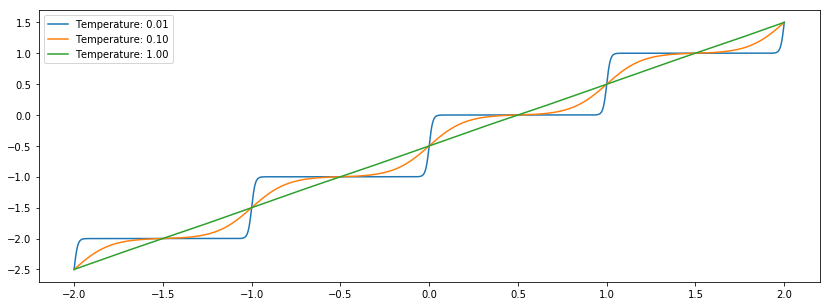

In [ ]:
# Plot

x = np.linspace(-2, 2, 2000)[..., np.newaxis]
_plot(3, softfloor,['temperature'], x)

In [ ]:
# Gumbel bijector using broadcasting

exps = tfb.GumbelCDF(loc=[0.5, 1, 1.5, 2, 3], scale=[1, 2, 2, 3, 4])

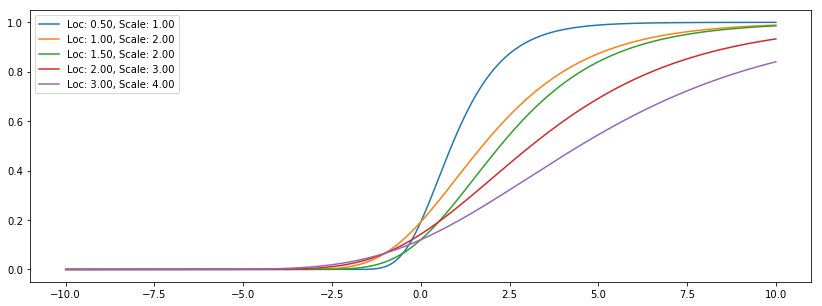

In [ ]:
# Plot

x = np.linspace(-10, 10, 2000, dtype=np.float32)[..., np.newaxis]
_plot(5, exps, ['loc', 'scale'], x)

***
<a id="coding_tutorial_2"></a>
## The TransformedDistribution class

### TransformedDistribution

In [ ]:
# Parameters

n = 10000
loc = 0
scale = 0.5

In [ ]:
# Normal distribution

normal = tfd.Normal(loc=loc, scale=scale)
normal

<tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>

In [ ]:
# Display event and batch shape

print('batch shape: ', normal.batch_shape)
print('event shape: ', normal.event_shape)

batch shape:  ()
event shape:  ()


In [ ]:
# Exponential bijector

exp = tfb.Exp()
exp

In [ ]:
# Log normal transformed distribution using exp and normal bijectors

log_normal_td = exp(normal)

In [ ]:
# Display event and batch shape

print('batch shape: ', log_normal_td.batch_shape)
print('event shape: ', log_normal_td.event_shape)

batch shape:  ()
event shape:  ()


In [ ]:
# Base distribution

z = normal.sample(n)
z

<tf.Tensor: shape=(10000,), dtype=float32, numpy=
array([-0.82094634, -0.04586147, -0.57336783, ...,  0.3930428 ,
       -1.3471197 , -0.84742343], dtype=float32)>

#### Plots

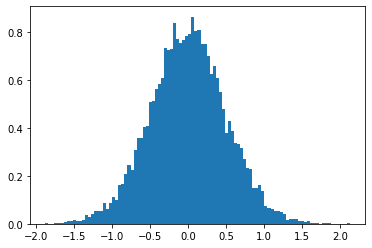

In [ ]:
# Plot z density

plt.hist(z, bins=100, density=True)
plt.show()

In [ ]:
# Transformed distribution

x = log_normal_td.sample(n)

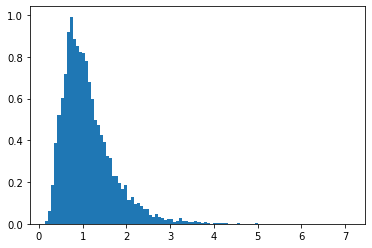

In [ ]:
# Plot x density

plt.hist(x, bins=100, density=True)
plt.show()

In [ ]:
# Define log normal distribution

log_normal = tfd.LogNormal(loc=loc, scale=scale)

In [ ]:
# Sample log_normal

l = log_normal.sample(n)

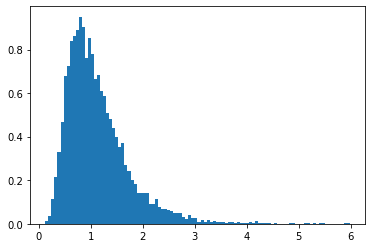

In [ ]:
# Plot l density
plt.hist(l, bins=100, density=True)
plt.show()


#### Log probability

In [ ]:
# Log prob of LogNormal

log_prob = log_normal.log_prob(x)

In [ ]:
# Log prob of log normal transformed distribution

log_prob_td = log_normal_td.log_prob(x)

In [ ]:
# Check log probs
# TensorFlow中使用tf.norm计算向量、矩阵和张量的范

tf.norm(log_prob - log_prob_td)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

### Event shape and batch shape

In [ ]:
# Set a scaling lower triangular matrix

tril = tf.random.normal((2,4,4))
scale_low_tri = tf.linalg.LinearOperatorLowerTriangular(tril)
tril , scale_low_tri

(<tf.Tensor: shape=(2, 4, 4), dtype=float32, numpy=
 array([[[ 1.8232507 ,  0.9266104 ,  0.7600676 , -1.4786233 ],
         [ 0.1274961 , -0.7032342 , -0.81434906, -0.53082037],
         [ 0.5043286 ,  1.7256267 ,  1.9406197 ,  2.1483445 ],
         [-0.08146239,  0.15244256,  0.7207305 ,  0.19903173]],
 
        [[-0.9470685 , -0.3782289 ,  1.4097054 ,  3.0982494 ],
         [ 0.27840132,  0.18130936, -0.5929793 , -0.3302576 ],
         [-0.37081563, -0.3863231 ,  0.19524765, -0.35561183],
         [-1.8142613 ,  1.4022106 ,  0.12953152,  0.7803176 ]]],
       dtype=float32)>,
 <tensorflow.python.ops.linalg.linear_operator_lower_triangular.LinearOperatorLowerTriangular at 0x7f79ee16ba50>)

In [ ]:
# View of scale_low_tri

scale_low_tri.to_dense()

<tf.Tensor: shape=(2, 4, 4), dtype=float32, numpy=
array([[[ 1.8232507 ,  0.        ,  0.        ,  0.        ],
        [ 0.1274961 , -0.7032342 ,  0.        ,  0.        ],
        [ 0.5043286 ,  1.7256267 ,  1.9406197 ,  0.        ],
        [-0.08146239,  0.15244256,  0.7207305 ,  0.19903173]],

       [[-0.9470685 ,  0.        ,  0.        ,  0.        ],
        [ 0.27840132,  0.18130936,  0.        ,  0.        ],
        [-0.37081563, -0.3863231 ,  0.19524765,  0.        ],
        [-1.8142613 ,  1.4022106 ,  0.12953152,  0.7803176 ]]],
      dtype=float32)>

In [ ]:
# Define scale linear operator

scale_lin_op = tfb.ScaleMatvecLinearOperator(scale_low_tri)
scale_lin_op

In [ ]:
# Define scale linear operator transformed distribution with a batch and event shape

# mvn = tfd.TransformedDistribution(normal, scale_lin_op, batch_shape=[2], event_shape=[4])
mvn = tfd.TransformedDistribution(normal, scale_lin_op)
print(mvn)

tfp.distributions.TransformedDistribution("scale_matvec_linear_operatorNormal", batch_shape=[], event_shape=[], dtype=float32)


In [ ]:
# Display event and batch shape

print('batch shape: ', mvn.batch_shape)
print('event shape: ', mvn.event_shape)

batch shape:  ()
event shape:  ()


In [ ]:
# Sample

y1 = mvn.sample(sample_shape=(n,))
print(y1.shape)

ValueError: ignored

In [ ]:
# Define a MultivariateNormalLinearOperator distribution

mvn2 = tfd.MultivariateNormalLinearOperator(loc=0, scale=scale_low_tri)
print(mvn2)

tfp.distributions.MultivariateNormalLinearOperator("MultivariateNormalLinearOperator", batch_shape=[2], event_shape=[4], dtype=float32)


In [ ]:
# Display event and batch shape
print('batch shape: ', mvn2.batch_shape)
print('event shape: ', mvn2.event_shape)


batch shape:  (2,)
event shape:  (4,)


In [ ]:
# Sample
y2 = mvn2.sample(sample_shape=(n,))
print(y2.shape)


(10000, 2, 4)


In [ ]:
# Check
xn = normal.sample((n,2,4))

tf.norm(mvn.log_prob(xn) - mvn2.log_prob(xn)) / tf.norm(mvn.log_prob(xn))

#  should be 0.0  ??

<tf.Tensor: shape=(), dtype=float32, numpy=0.7498836>

***
<a id="coding_tutorial_3"></a>
## Subclassing bijectors

In [2]:
# Define a new bijector: Cubic

class Cubic(tfb.Bijector):

    def __init__(self, a, b, validate_args=False, name='Cubic'):
        self.a = tf.cast(a, tf.float32)
        self.b = tf.cast(b, tf.float32)
        if validate_args:
            assert tf.reduce_mean(tf.cast(tf.math.greater_equal(tf.abs(self.a), 1e-5), tf.float32)) == 1.0
            assert tf.reduce_mean(tf.cast(tf.math.greater_equal(tf.abs(self.b), 1e-5), tf.float32)) == 1.0
        super(Cubic, self).__init__(
            validate_args=validate_args, forward_min_event_ndims=0, name=name)

    def _forward(self, x):
        x = tf.cast(x, tf.float32)
        return tf.squeeze(tf.pow(self.a * x + self.b, 3))
    
    def _inverse(self, y):
        y = tf.cast(y, tf.float32)
        return (tf.math.sign(y) * tf.pow(tf.abs(y), 1/3)  - self.b) / self.a
    
    def _forward_log_det_jacobian(self, x):
        x = tf.cast(x, tf.float32)
        return tf.math.log ( 3 * tf.abs(self.a)) + 2. * tf.math.log(tf.abs(self.a * x + self.b))

In [3]:
# Cubic bijector

cubic = Cubic([1.0, -2.0], [-1.0, 0.4], validate_args=True)

In [4]:
# Apply forward transformation

x = tf.constant([[1, 2], [3, 4]])
y = cubic.forward(x)
print(y)

tf.Tensor(
[[   0.        -46.655994]
 [   8.       -438.97598 ]], shape=(2, 2), dtype=float32)


In [5]:
# Check inverse

np.linalg.norm( x - cubic.inverse(y))

0.0

#### Function plots

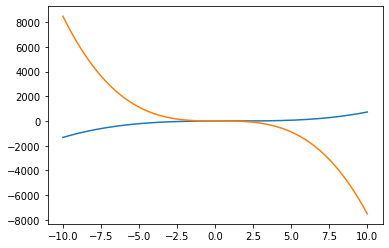

In [6]:
# Plot the forward transformation

x = np.linspace(-10, 10, 500).reshape(-1, 1)
plt.plot(x, cubic.forward(x))

In [7]:
# Display shape

print(cubic.forward(x).shape)

(500, 2)


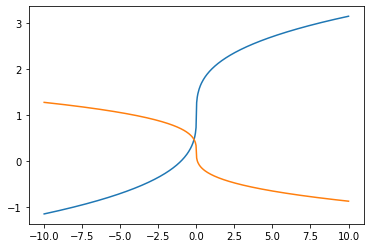

In [8]:
# Plot the inverse

plt.plot(x, cubic.inverse(x))

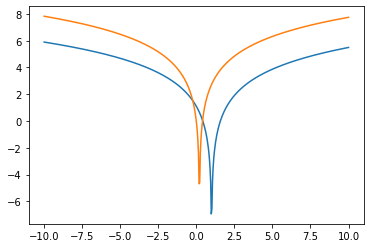

In [9]:
# Plot the forward log Jacobian determinant

plt.plot(x, cubic.forward_log_det_jacobian(x, event_ndims=0))

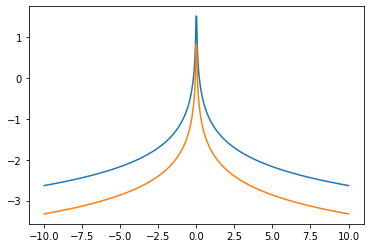

In [10]:
# Plot the inverse log Jacobian determinant

plt.plot(x, cubic.inverse_log_det_jacobian(x, event_ndims=0))

#### TransformedDistribution and plots

In [14]:
# Create a transformed distribution with Cubic

normal = tfd.Normal(loc=0., scale=1.)
cubed_normal = tfd.TransformedDistribution(normal, cubic, event_shape=[2])

TypeError: ignored

In [13]:
# Sample cubed_normal

n = 1000
g = cubed_normal.sample(n)
g.shape


InvalidArgumentError: ignored

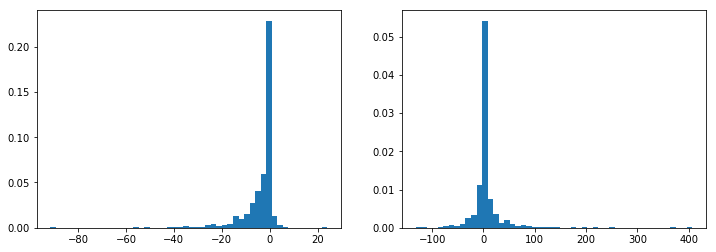

In [ ]:
# Plot histograms

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(g[..., 0], bins=50, density=True)
plt.subplot(1, 2, 2)
plt.hist(g[..., 1], bins=50, density=True)
plt.show()

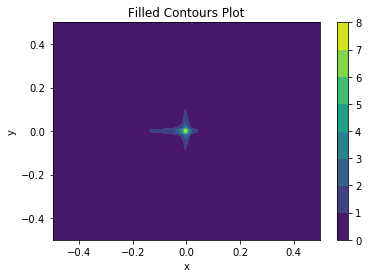

In [ ]:
# Make contour plot

xx = np.linspace(-0.5, 0.5, 100)
yy = np.linspace(-0.5, 0.5, 100)
X, Y = np.meshgrid(xx, yy)

fig,ax=plt.subplots(1,1)
Z = cubed_normal.prob(np.dstack((X, Y)))
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [ ]:
# Create a transformed distribution with the inverse of Cube

inverse_cubic = tfb.Invert(cubic)
inv_cubed_normal = inverse_cubic(normal, event_shape=[2])

In [ ]:
# Samble inv_cubed_normal
n = 1000
g = inv_cubed_normal.sample(n)
g.shape


TensorShape([1000, 2])

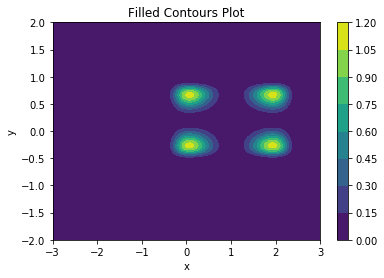

In [ ]:
# Make contour plot

xx = np.linspace(-3.0, 3.0, 100)
yy = np.linspace(-2.0, 2.0, 100)
X, Y = np.meshgrid(xx, yy)

fig,ax=plt.subplots(1,1)
Z = inv_cubed_normal.prob(np.dstack((X, Y)))
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

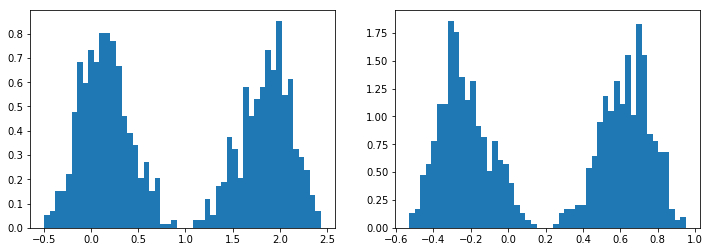

In [ ]:
# Plot histograms

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(g[..., 0], bins=50, density=True)
plt.subplot(1, 2, 2)
plt.hist(g[..., 1], bins=50, density=True)
plt.show()

#### Training the bijector

In [ ]:
# Create a mixture of four Gaussians
probs = [0.45, 0.55]
mix_gauss = tfd.Mixture(
    cat=tfd.Categorical(probs=probs),
    components=[
        tfd.Normal(loc=2.3, scale=0.4),
        tfd.Normal(loc=-0.8,  scale=0.4)
    ]
)


In [ ]:
# Create the dataset

x_train = mix_gauss.sample(10000)
x_train = tf.data.Dataset.from_tensor_slices(x_train)
x_train = x_train.batch(128)

x_valid = mix_gauss.sample(1000)
x_valid = tf.data.Dataset.from_tensor_slices(x_valid)
x_valid = x_valid.batch(128)

print(x_train.element_spec)
print(x_valid.element_spec)

TensorSpec(shape=(None,), dtype=tf.float32, name=None)
TensorSpec(shape=(None,), dtype=tf.float32, name=None)


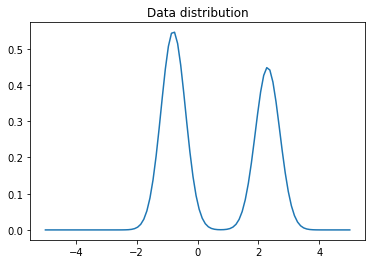

In [ ]:
# Plot the data distribution

x = np.linspace(-5.0, 5.0, 100)
plt.plot(x, mix_gauss.prob(x))
plt.title('Data distribution')
plt.show()

In [ ]:
# Make a trainable bijector

trainable_inv_cubic = tfb.Invert(Cubic(tf.Variable(0.25), tf.Variable(-0.1)))
trainable_inv_cubic.trainable_variables

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.25>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.1>)

In [ ]:
# Make a trainable transformed distribution

trainable_dist = tfd.TransformedDistribution(normal, trainable_inv_cubic)

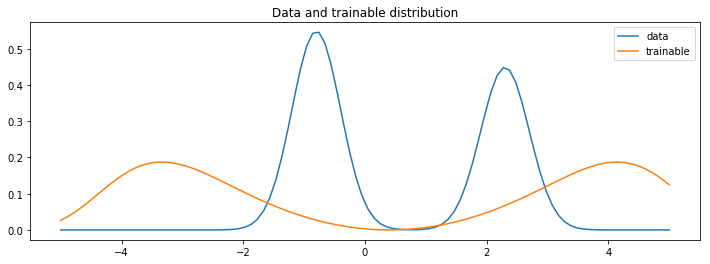

In [ ]:
# Plot the data and learned distributions

x = np.linspace(-5.0, 5.0, 100)

plt.figure(figsize=(12,4))
plt.plot(x, mix_gauss.prob(x), label='data')
plt.plot(x, trainable_dist.prob(x), label='trainable')
plt.legend()
plt.title('Data and trainable distribution')
plt.show()


In [ ]:
# Train the bijector

num_epochs = 10
opt = tf.keras.optimizers.Adam()
train_losses = []
valid_losses = []

for epoch in range(num_epochs):
    print("Epoch {}...".format(epoch))
    train_loss = tf.keras.metrics.Mean()
    val_loss = tf.keras.metrics.Mean()
    for train_batch in x_train:
        with tf.GradientTape() as tape:
            tape.watch(trainable_inv_cubic.trainable_variables)
            loss = -trainable_dist.log_prob(train_batch)
        train_loss(loss)
        grads = tape.gradient(loss, trainable_inv_cubic.trainable_variables)
        opt.apply_gradients(zip(grads, trainable_inv_cubic.trainable_variables))
    train_losses.append(train_loss.result().numpy())
        
    # Validation
    for valid_batch in x_valid:
        loss = -trainable_dist.log_prob(valid_batch)
        val_loss(loss)
    valid_losses.append(val_loss.result().numpy())

Epoch 0...
Epoch 1...
Epoch 2...
Epoch 3...
Epoch 4...
Epoch 5...
Epoch 6...
Epoch 7...
Epoch 8...
Epoch 9...


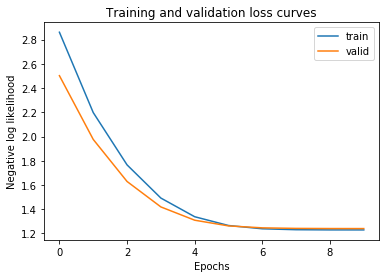

In [ ]:
# Plot the learning curves

plt.plot(train_losses, label='train')
plt.plot(valid_losses, label='valid')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Negative log likelihood")
plt.title("Training and validation loss curves")
plt.show()

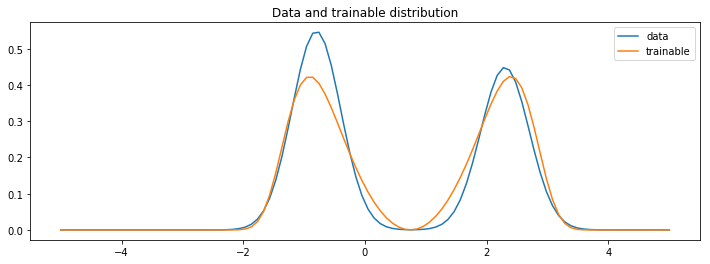

In [ ]:
# Plot the data and learned distributions

x = np.linspace(-5.0, 5.0, 100)

plt.figure(figsize=(12,4))
plt.plot(x, mix_gauss.prob(x), label='data')
plt.plot(x, trainable_dist.prob(x), label='trainable')
plt.legend()
plt.title('Data and trainable distribution')
plt.show()

In [ ]:
# Display trainable variables

trainable_inv_cubic.trainable_variables

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.5652556>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.42125523>)

***
<a id="coding_tutorial_4"></a>
## Normalising flows

In [ ]:
# Load dataset

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
n_samples = 1000
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X, y = noisy_moons
X_data = StandardScaler().fit_transform(X)
xlim, ylim = [-2, 2], [-2, 2]

(-2, 2)

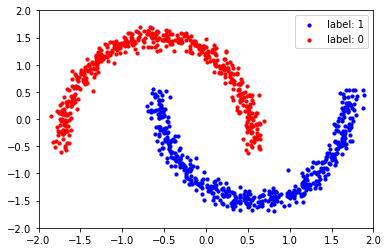

In [ ]:
# Plot with labels

y_label = y.astype(np.bool)
X_train, Y_train = X_data[..., 0], X_data[..., 1]
plt.scatter(X_train[y_label], Y_train[y_label], s=10, color='blue')
plt.scatter(X_train[y_label == False], Y_train[y_label == False], s=10, color='red')
plt.legend(['label: 1', 'label: 0'])
plt.xlim(xlim)
plt.ylim(ylim)

In [ ]:
# Define base distribution

base_distribution = tfd.Normal(loc=0, scale=1)

In [ ]:
# Define the trainable distribution

def make_masked_autoregressive_flow(hidden_units=[16, 16], activation='relu'):
    made = tfb.AutoregressiveNetwork(
        params=2, event_shape=[2], hidden_units=hidden_units, activation=activation)
    return tfb.MaskedAutoregressiveFlow(shift_and_log_scale_fn=made)

trainble_distribution = tfd.TransformedDistribution(base_distribution, 
                                                    make_masked_autoregressive_flow(),
                                                   event_shape=[2])

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tensorflow.compat.v1 import logging
logging.set_verbosity(logging.ERROR)

In [ ]:
# Define a plot contour routine

def plot_contour_prob(dist, rows=1, title=[''], scale_fig=4):
    cols = int(len(dist) / rows)
    xx = np.linspace(-5.0, 5.0, 100)
    yy = np.linspace(-5.0, 5.0, 100)
    X, Y = np.meshgrid(xx, yy)

    fig, ax = plt.subplots(rows, cols, figsize=(scale_fig * cols, scale_fig * rows))
    fig.tight_layout(pad=4.5)

    i = 0
    for r in range(rows):
        for c in range(cols):
            Z = dist[i].prob(np.dstack((X, Y)))
            if len(dist) == 1:
                axi = ax
            elif rows == 1:
                axi = ax[c]
            else:
                axi = ax[r, c]

            # Plot contour
            p = axi.contourf(X, Y, Z)

            # Add a colorbar
            divider = make_axes_locatable(axi)
            cax = divider.append_axes("right", size="5%", pad=0.1)
            cbar = fig.colorbar(p, cax=cax)

            # Set title and labels
            axi.set_title('Filled Contours Plot: ' + str(title[i]))
            axi.set_xlabel('x')
            axi.set_ylabel('y')

            i += 1
    plt.show()

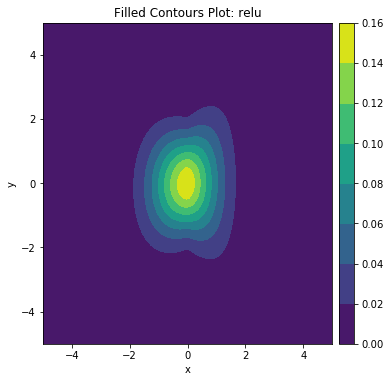

In [ ]:
# Plot contour

activation = 'relu'
maf = tfd.TransformedDistribution(base_distribution,
                                 make_masked_autoregressive_flow(activation=activation),
                                 event_shape=[2])
plot_contour_prob([maf], scale_fig=6, title=[activation])

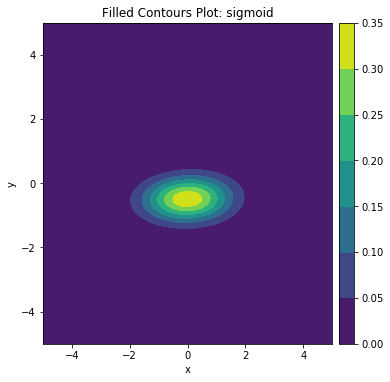

In [ ]:
# Plot contour

activation = 'sigmoid'
maf = tfd.TransformedDistribution(base_distribution,
                                 make_masked_autoregressive_flow(activation=activation),
                                 event_shape=[2])
plot_contour_prob([maf], scale_fig=6, title=[activation])

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras import Model

In [ ]:
# Make samples

x = base_distribution.sample((1000,2))
names = [base_distribution.name, trainble_distribution.bijector.name]
samples = [x, trainble_distribution.bijector.forward(x)]

In [ ]:
# Define a scatter plot routine for the bijectors

def _plot(results, rows=1, legend=False):
    cols = int(len(results) / rows)
    f, arr = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
    i = 0
    for r in range(rows):
        for c in range(cols):
            res = results[i]
            X, Y = res[..., 0].numpy(), res[..., 1].numpy()
            if rows == 1:
                p = arr[c]
            else:
                p = arr[r, c]
            p.scatter(X, Y, s=10, color='red')
            p.set_xlim([-5, 5])
            p.set_ylim([-5, 5])
            p.set_title(names[i])
            
            i += 1

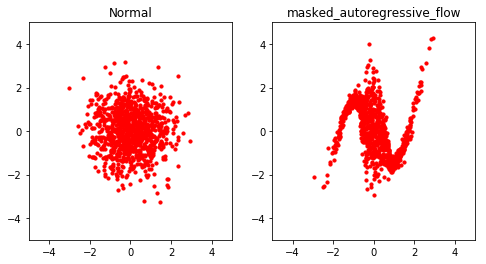

In [ ]:
# Plot

_plot(samples)

#### Training a MaskedAutoregressiveFlow bijector

In [ ]:
from tensorflow.keras.callbacks import LambdaCallback

In [ ]:
# Define a training routine

def train_dist_routine(trainable_distribution, n_epochs=200, batch_size=None, n_disp=100):
    x_ = Input(shape=(2,), dtype=tf.float32)
    log_prob_ = trainable_distribution.log_prob(x_)
    model = Model(x_, log_prob_)

    model.compile(optimizer=tf.optimizers.Adam(),
                  loss=lambda _, log_prob: -log_prob)

    ns = X_data.shape[0]
    if batch_size is None:
        batch_size = ns

    # Display the loss every n_disp epoch
    epoch_callback = LambdaCallback(
        on_epoch_end=lambda epoch, logs: 
                        print('\n Epoch {}/{}'.format(epoch+1, n_epochs, logs),
                              '\n\t ' + (': {:.4f}, '.join(logs.keys()) + ': {:.4f}').format(*logs.values()))
                                       if epoch % n_disp == 0 else False 
    )


    history = model.fit(x=X_data,
                        y=np.zeros((ns, 0), dtype=np.float32),
                        batch_size=batch_size,
                        epochs=n_epochs,
                        validation_split=0.2,
                        shuffle=True,
                        verbose=False,
                        callbacks=[epoch_callback])
    return history

In [ ]:
# Train the distribution

history = train_dist_routine(trainble_distribution, n_epochs=600, n_disp=50)


 Epoch 1/600 
	 loss: 2.5896, val_loss: 2.6303

 Epoch 51/600 
	 loss: 2.5379, val_loss: 2.5719

 Epoch 101/600 
	 loss: 2.4623, val_loss: 2.4829

 Epoch 151/600 
	 loss: 2.3440, val_loss: 2.3393

 Epoch 201/600 
	 loss: 2.2467, val_loss: 2.2307

 Epoch 251/600 
	 loss: 2.1970, val_loss: 2.1833

 Epoch 301/600 
	 loss: 2.1627, val_loss: 2.1513

 Epoch 351/600 
	 loss: 2.1346, val_loss: 2.1266

 Epoch 401/600 
	 loss: 2.1109, val_loss: 2.1049

 Epoch 451/600 
	 loss: 2.0928, val_loss: 2.0935

 Epoch 501/600 
	 loss: 2.0778, val_loss: 2.0810

 Epoch 551/600 
	 loss: 2.0648, val_loss: 2.0771


In [ ]:
# Get losses

train_losses = history.history['loss']
valid_losses = history.history['val_loss']

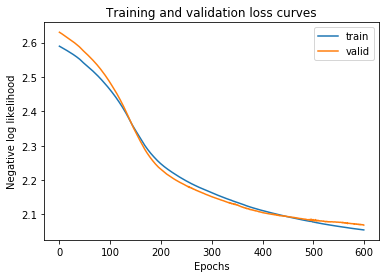

In [ ]:
# Plot loss vs epoch

plt.plot(train_losses, label='train')
plt.plot(valid_losses, label='valid')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Negative log likelihood")
plt.title("Training and validation loss curves")
plt.show()

In [ ]:
# Make samples


x = base_distribution.sample((1000,2))
names = [base_distribution.name, trainble_distribution.bijector.name]
samples = [x, trainble_distribution.bijector.forward(x)]

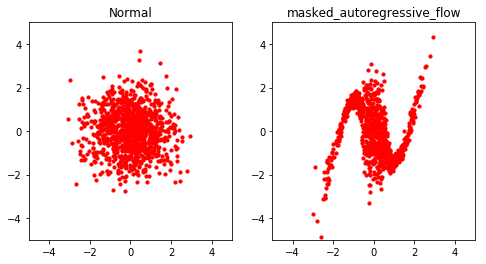

In [ ]:
# Plot

_plot(samples)

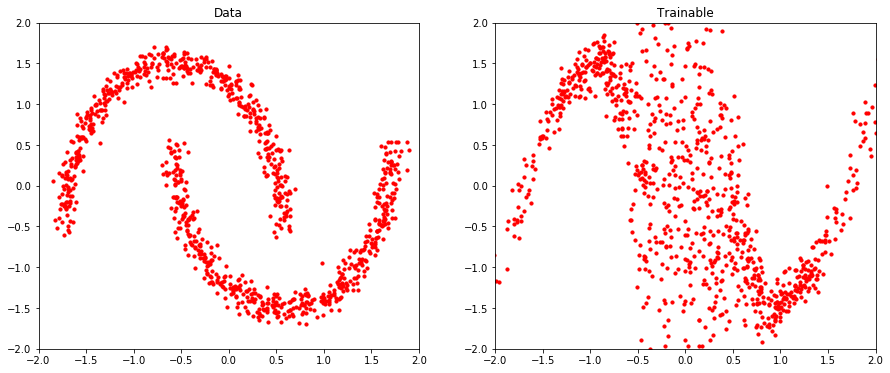

In [ ]:
# Define a plot routine

def visualize_training_data(samples):
    f, arr = plt.subplots(1, 2, figsize=(15, 6))
    names = ['Data', 'Trainable']
    samples = [tf.constant(X_data), samples[-1]]

    for i in range(2):
        res = samples[i]
        X, Y = res[..., 0].numpy(), res[..., 1].numpy()
        arr[i].scatter(X, Y, s=10, color='red')
        arr[i].set_xlim([-2, 2])
        arr[i].set_ylim([-2, 2])
        arr[i].set_title(names[i])

visualize_training_data(samples)

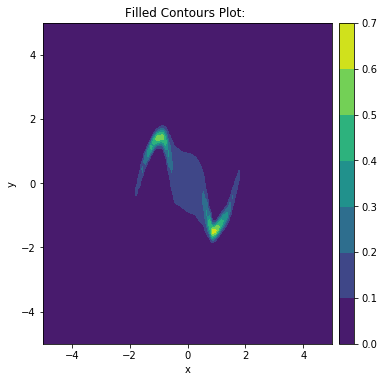

In [ ]:
# Plot contour

plot_contour_prob([trainble_distribution], scale_fig=6)

#### Training a chain of MaskedAutoregressiveFlow bijectors

In [ ]:
# Define a more expressive model

num_bijectors = 6
bijectors = []

for i in range(num_bijectors):
    masked_auto_i = make_masked_autoregressive_flow(hidden_units=[256,256], activation='relu')
    bijectors.append(masked_auto_i)
    bijectors.append(tfb.Permute(permutation=[1,0]))

flow_bijector = tfb.Chain(list(reversed(bijectors[:-1])))

In [ ]:
# Define the trainable distribution

trainable_distribution = tfd.TransformedDistribution(distribution=base_distribution,
                                                   bijector=flow_bijector,
                                                   event_shape=[2])

In [ ]:
# Make samples

def make_samples():
    x = base_distribution.sample((1000, 2))
    samples = [x]
    names = [base_distribution.name]
    for bijector in reversed(trainable_distribution.bijector.bijectors):
        x = bijector.forward(x)
        samples.append(x)
        names.append(bijector.name)
    return names, samples

names, samples = make_samples()

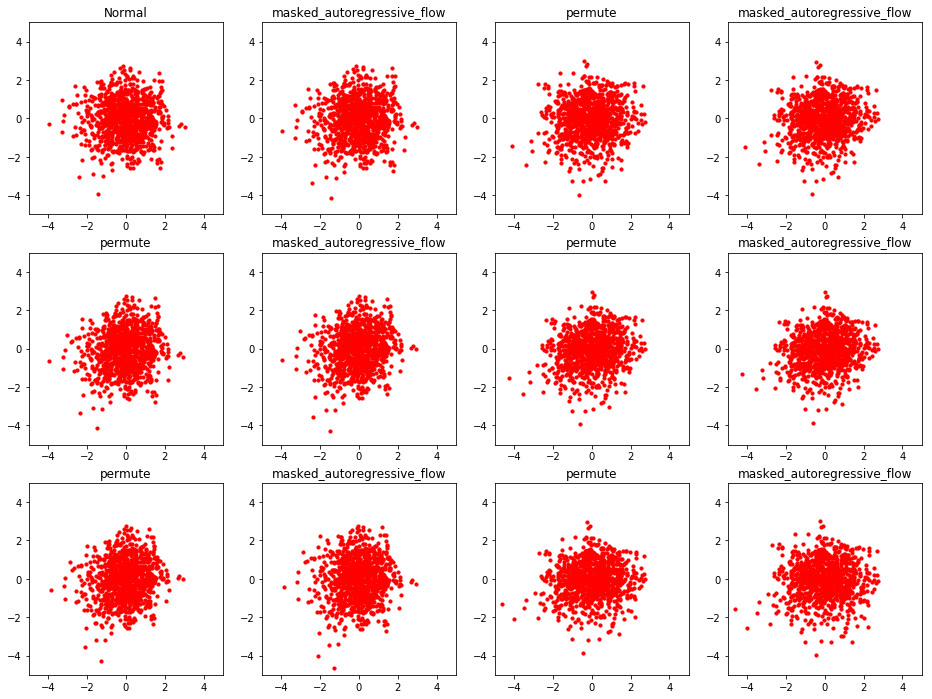

In [ ]:
# Plot
_plot(samples, 3)


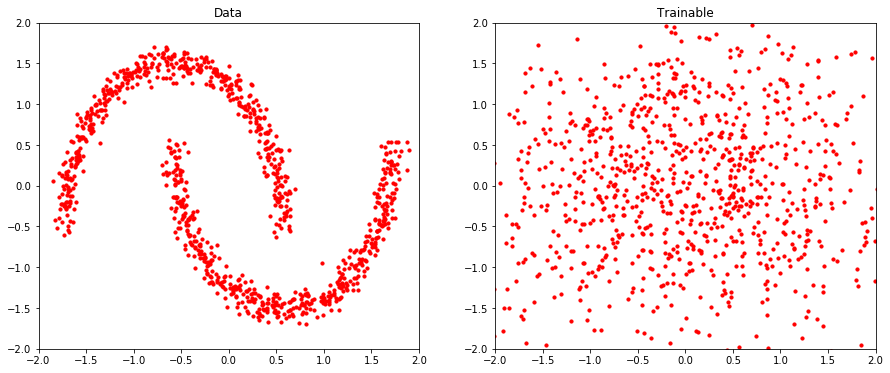

In [ ]:
# Plot

visualize_training_data(samples)

In [ ]:
# Train the distribution

history = train_dist_routine(trainable_distribution, n_epochs=600, n_disp=50)


 Epoch 1/600 
	 loss: 2.8555, val_loss: 2.7076

 Epoch 51/600 
	 loss: 2.1837, val_loss: 2.2080

 Epoch 101/600 
	 loss: 2.8913, val_loss: 2.9952

 Epoch 151/600 
	 loss: 2.1474, val_loss: 2.1444

 Epoch 201/600 
	 loss: 2.0539, val_loss: 1.9774

 Epoch 251/600 
	 loss: 1.6505, val_loss: 1.6422

 Epoch 301/600 
	 loss: 1.3709, val_loss: 1.4688

 Epoch 351/600 
	 loss: 1.2303, val_loss: 1.6204

 Epoch 401/600 
	 loss: 1.1829, val_loss: 1.6839

 Epoch 451/600 
	 loss: 1.1527, val_loss: 1.8190

 Epoch 501/600 
	 loss: 1.1429, val_loss: 1.7514

 Epoch 551/600 
	 loss: 1.1307, val_loss: 1.9032


In [ ]:
# Get losses

train_losses = history.history['loss']
valid_losses = history.history['val_loss']

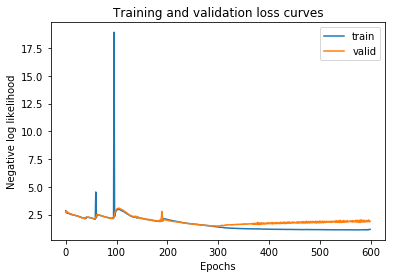

In [ ]:
# Plot loss vs epoch

plt.plot(train_losses, label='train')
plt.plot(valid_losses, label='valid')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Negative log likelihood")
plt.title("Training and validation loss curves")
plt.show()

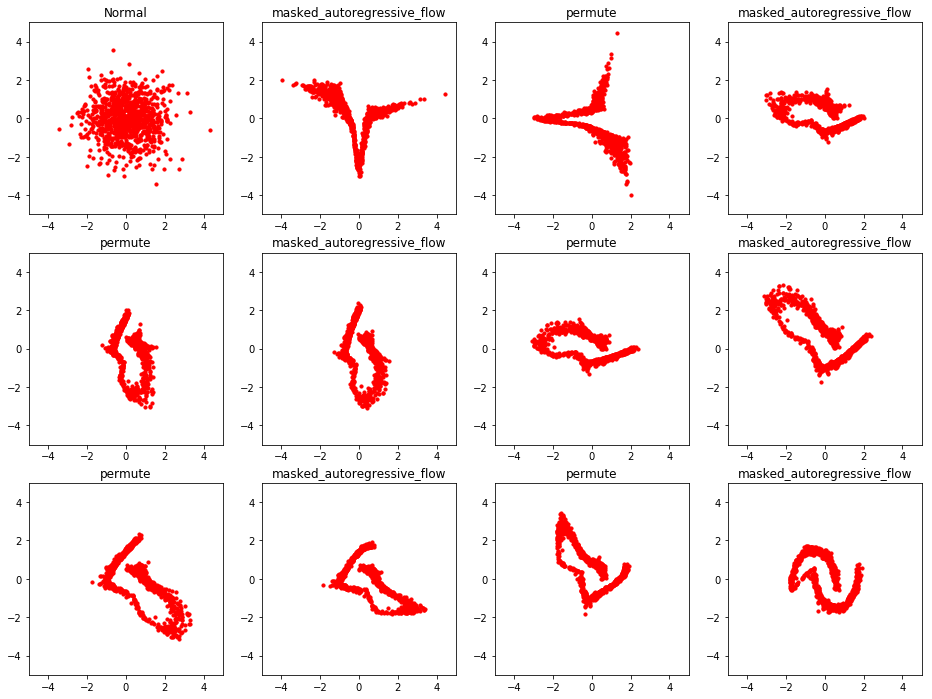

In [ ]:
# Make samples and plot

names, samples = make_samples()
_plot(samples, 3)

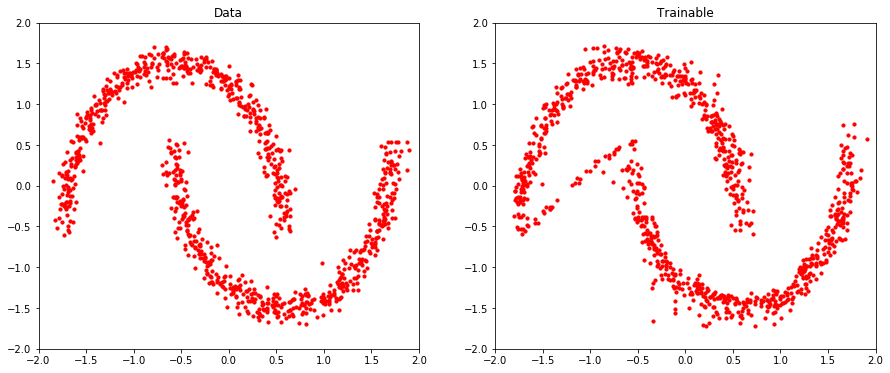

In [ ]:
# Plot

visualize_training_data(samples)

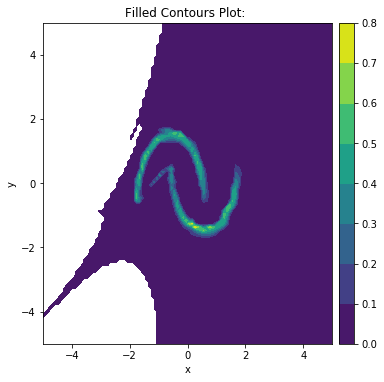

In [ ]:
# Plot

plot_contour_prob([trainable_distribution], scale_fig=6)